In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from sql_to_df import retrieve_data

/Users/Home/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/Home/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
df = retrieve_data("AAPL")

In [3]:
def load_data(stock, seq_len):
    amount_of_features = len(stock.columns)
    data = stock.as_matrix()
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
        
    result = np.array(result)
    train_rows = round(0.9 * result.shape[0])
    train = result[:int(train_rows), :]
    x_train = train[:, :-1]
    y_train = train[:, -1][:,-1]
    x_test = result[int(train_rows):, :-1]
    y_test = result[int(train_rows):, -1][:,-1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return [x_train, y_train, x_test, y_test]

In [4]:
window = 10
X_train, y_train, X_test, y_test = load_data(df, window)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (4117, 10, 4)
y_train (4117,)
X_test (457, 10, 4)
y_test (457,)


In [13]:
def build_model(layers):
    batch_size = 4
    timesteps = layers[1]
    data_dim = layers[0]
    
    model = Sequential()
    model.add(LSTM(32, stateful=True, batch_input_shape=(batch_size, timesteps, data_dim)))
    model.add(Dense(32, activation='relu', kernel_initializer="uniform"))        
    model.add(Dense(1, activation="linear", kernel_initializer="uniform"))
    model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    return model

model = build_model([4,window])

In [23]:
X_train = X_train[:4112]
y_train = y_train[:4112]
X_test = X_test[:456]
y_test = y_test[:456]

In [15]:
model.fit(
    X_train[:4112],
    y_train[:4112],
    batch_size=4,
    nb_epoch=10,
    validation_split=0.1,
    verbose=1)

/Users/Home/anaconda/lib/python3.6/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 3700 samples, validate on 412 samples
Epoch 1/10
3700/3700 [==============================] - 10s 3ms/step - loss: 265.6518 - acc: 2.7027e-04 - val_loss: 1163.5937 - val_acc: 0.0000e+00
Epoch 2/10
3700/3700 [==============================] - 9s 2ms/step - loss: 7.3086 - acc: 0.0000e+00 - val_loss: 497.8467 - val_acc: 0.0000e+00
Epoch 3/10
3700/3700 [==============================] - 9s 2ms/step - loss: 2.7953 - acc: 8.1081e-04 - val_loss: 602.8063 - val_acc: 0.0000e+00
Epoch 4/10
3700/3700 [==============================] - 10s 3ms/step - loss: 1.3848 - acc: 5.4054e-04 - val_loss: 280.4083 - val_acc: 0.0000e+00
Epoch 5/10
3700/3700 [==============================] - 10s 3ms/step - loss: 1.6780 - acc: 8.1081e-04 - val_loss: 313.7380 - val_acc: 0.0000e+00
Epoch 6/10
3700/3700 [==============================] - 9s 3ms/step - loss: 1.5144 - acc: 5.4054e-04 - val_loss: 279.5891 - val_acc: 0.0000e+00
Epoch 7/10
3700/3700 [==============================] - 9s 2ms/step - loss: 1.0187 

In [19]:
X_train.shape

(4112, 10, 4)

In [24]:
trainScore = model.evaluate(X_train, y_train, batch_size=4, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

testScore = model.evaluate(X_test, y_test, batch_size=4, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))

Train Score: 23.82 MSE (4.88 RMSE)
Test Score: 2332.67 MSE (48.30 RMSE)


In [27]:
p = model.predict(X_test, batch_size=4)
print(p)

[[95.033295]
 [94.70891 ]
 [94.24867 ]
 [93.86717 ]
 [94.32769 ]
 [92.12705 ]
 [94.61411 ]
 [94.67474 ]
 [94.798454]
 [94.60138 ]
 [93.12259 ]
 [93.76674 ]
 [93.53215 ]
 [93.74481 ]
 [91.92215 ]
 [92.27486 ]
 [92.49263 ]
 [92.32368 ]
 [93.002556]
 [89.91011 ]
 [88.98602 ]
 [90.92178 ]
 [91.81775 ]
 [92.436005]
 [92.81782 ]
 [91.954254]
 [92.61039 ]
 [93.06743 ]
 [93.537384]
 [93.84192 ]
 [94.13025 ]
 [93.666306]
 [94.54541 ]
 [94.506775]
 [94.89441 ]
 [94.945175]
 [95.01435 ]
 [94.54238 ]
 [94.25161 ]
 [93.36833 ]
 [93.26439 ]
 [95.56325 ]
 [95.76337 ]
 [95.73544 ]
 [96.00557 ]
 [95.54406 ]
 [96.06413 ]
 [96.11392 ]
 [96.19552 ]
 [96.2998  ]
 [96.34447 ]
 [96.30238 ]
 [96.29436 ]
 [96.33293 ]
 [96.30983 ]
 [96.36793 ]
 [96.373276]
 [96.389755]
 [96.33064 ]
 [96.32333 ]
 [96.353226]
 [96.31074 ]
 [96.26346 ]
 [96.17537 ]
 [96.20852 ]
 [96.120834]
 [96.17461 ]
 [96.208565]
 [96.29021 ]
 [96.30772 ]
 [96.24801 ]
 [95.82947 ]
 [95.32829 ]
 [95.7094  ]
 [96.25171 ]
 [95.98274 ]
 [96.51878 ]

In [28]:
diff=[]
ratio=[]
for u in range(len(y_test)):
    predicted = p[u][0]
    ratio.append((y_test[u]/predicted)-1)
    diff.append(abs(y_test[u]- predicted))
    print(u, y_test[u], predicted, (y_test[u]/predicted)-1, abs(y_test[u]- predicted))

0 96.5756 95.033295 0.01622910504677022 1.5423053222656193
1 96.0967 94.70891 0.01465323534041385 1.387791918945311
2 94.4353 94.24867 0.001980160672050202 0.18662751464843552
3 95.2367 93.86717 0.014590060892319068 1.3695277587890615
4 95.3344 94.32769 0.010672474584710434 1.0067098754882835
5 96.7124 92.12705 0.049772000493239155 4.585347692871096
6 96.4387 94.61411 0.019284513599060693 1.824587145996091
7 96.2237 94.67474 0.01636081903051334 1.5489563476562438
8 96.2433 94.798454 0.01524123706693925 1.4448457153320362
9 94.8946 94.60138 0.003099538371907684 0.29322060546874695
10 94.5526 93.12259 0.015356219176448027 1.4300108886718732
11 94.8262 93.76674 0.011298901091390423 1.0594611083984375
12 93.888 93.53215 0.003804571266923462 0.35584973144531773
13 93.1355 93.74481 -0.006499687808244614 0.6093120117187567
14 92.8716 91.92215 0.010328852679438505 0.9494503417968758
15 92.5257 92.27486 0.002718437524029227 0.250843432617188
16 93.1844 92.49263 0.007479190450965234 0.6917699951

280 143.7966 96.76052 0.4861081628168369 47.03607906494142
281 144.2348 96.762375 0.4906083090866571 47.47242512207032
282 144.8523 96.762955 0.4969809513491932 48.08934528808595
283 146.7346 96.76138 0.5164582746208459 49.973216943359375
284 147.9696 96.7637 0.5291849768178096 51.20589760742189
285 148.0692 96.7634 0.5302191144473076 51.30580278320312
286 149.344 96.76452 0.5433756292911862 52.579481262207025
287 149.5831 96.7648 0.5458420666906565 52.81829897460938
288 148.2784 96.76471 0.532360307885805 51.513690527343755
289 149.2942 96.76466 0.542858666553971 52.52953630371093
290 151.1866 96.76444 0.5624189648768294 54.42215755615234
291 152.4415 96.764786 0.5753819821158048 55.67671423339843
292 146.7048 96.76567 0.5160831193848274 49.93912922363282
293 148.5871 96.76075 0.5356133585279073 51.82635018310546
294 147.5314 96.76466 0.5246412725935805 50.76673630371093
295 147.8103 96.76377 0.5275376143901365 51.046528942871106
296 155.5289 96.7643 0.6072963276930148 58.764602514648

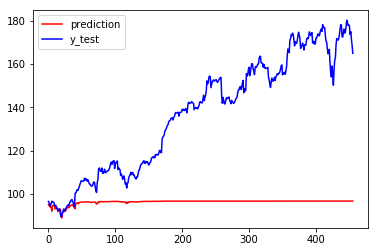

In [29]:
import matplotlib.pyplot as plt2

plt2.plot(p,color='red', label='prediction')
plt2.plot(y_test,color='blue', label='y_test')
plt2.legend(loc='upper left')
plt2.show()